In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('games.csv')
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [3]:
def novo_atr(df, str1, str2, novaStr, index):
    df.insert(index, novaStr, df[str1] - df[str2])
    for index, value in df['winner'].items():
        if value == 2:
            df[novaStr][index] = -df[novaStr][index]

In [4]:
novo_atr(df, 't1_towerKills', 't2_towerKills', 'towerKillsDiff', 0)
novo_atr(df, 't1_inhibitorKills', 't2_inhibitorKills', 'inhibitorKillsDiff', 1)
novo_atr(df, 't1_baronKills', 't2_baronKills', 'baronKillsDiff', 2)
novo_atr(df, 't1_dragonKills', 't2_dragonKills', 'dragonKillsDiff', 3)
novo_atr(df, 't1_riftHeraldKills', 't2_riftHeraldKills', 'riftHeraldDiff', 4)

In [5]:
df.head()

,towerKillsDiff,inhibitorKillsDiff,baronKillsDiff,dragonKillsDiff,riftHeraldDiff,gameId,creationTime,gameDuration,seasonId,winner,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,6,1,2,2,-1,3326086514,1504279457970,1949,9,1,...,5,0,0,1,1,114,67,43,16,51
1,8,4,0,2,1,3229566029,1497848803862,1851,9,1,...,2,0,0,0,0,11,67,238,51,420
2,6,1,1,0,0,3327363504,1504360103310,1493,9,1,...,2,0,0,1,0,157,238,121,57,28
3,9,2,1,2,0,3326856598,1504348503996,1758,9,1,...,0,0,0,0,0,164,18,141,40,51
4,6,2,1,2,0,3330080762,1504554410899,2094,9,1,...,3,0,0,1,0,86,11,201,122,18


In [6]:
def meu_plot(atributo, x, y, bins):
    plt.figure(figsize=(16, 8))
    plt.hist(atributo, edgecolor='k', bins=bins)
    plt.xlabel(x)
    plt.ylabel(y)

    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

In [15]:
def meu_plot(atributo, x, y, discr=True):
    bins = 40
    if discr:
        d = np.diff(np.unique(atributo)).min()
        left_of_first_bin = atributo.min() - float(d)/2
        right_of_last_bin = atributo.max() + float(d)/2
        bins = np.arange(left_of_first_bin, right_of_last_bin + d, d)
    plt.figure(figsize=(16, 8))
    plt.hist(atributo, edgecolor='k', bins=bins)
    plt.xlabel(x)
    plt.ylabel(y)
    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

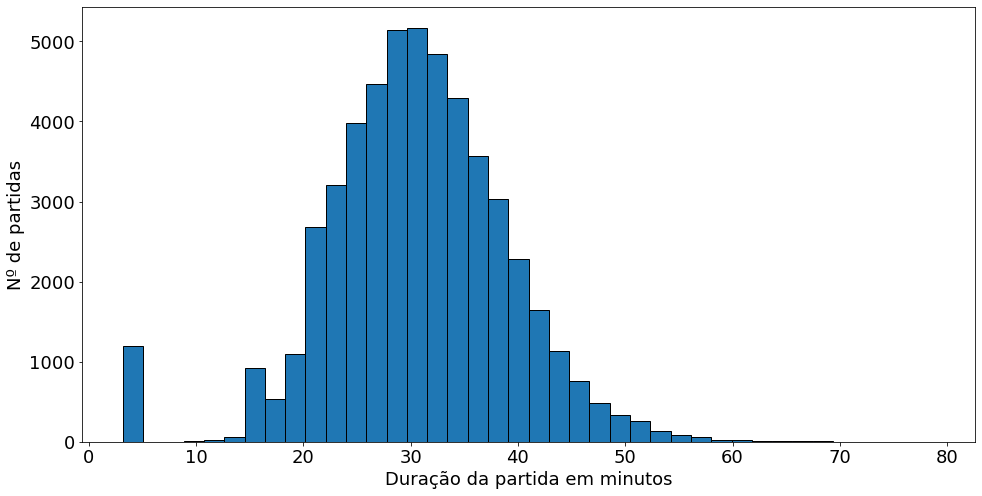

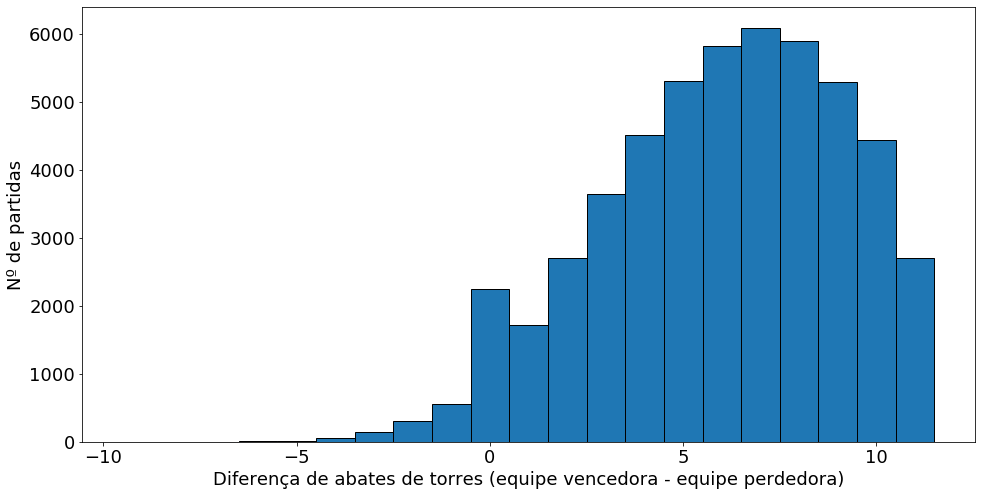

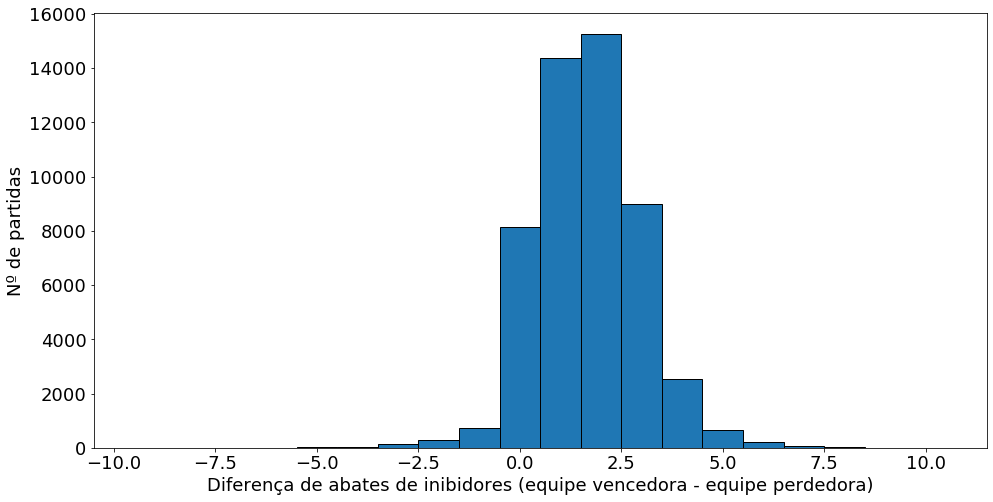

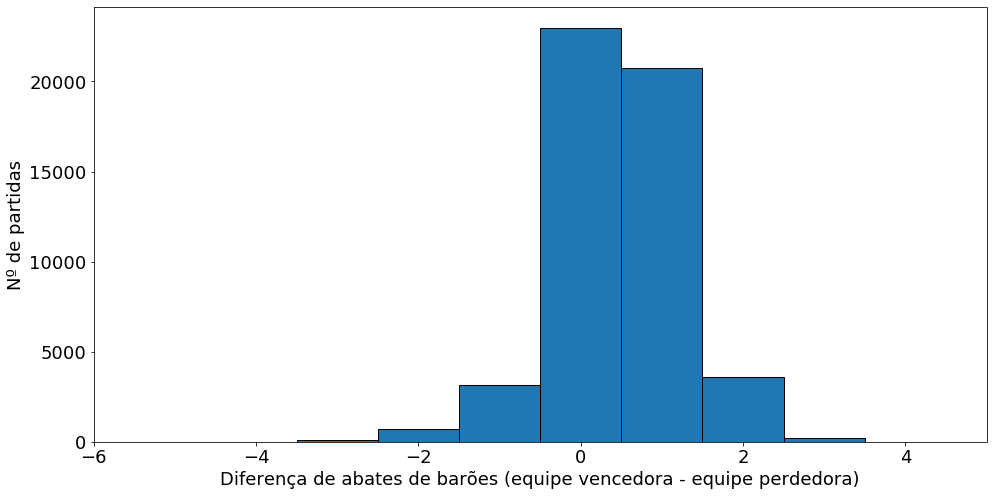

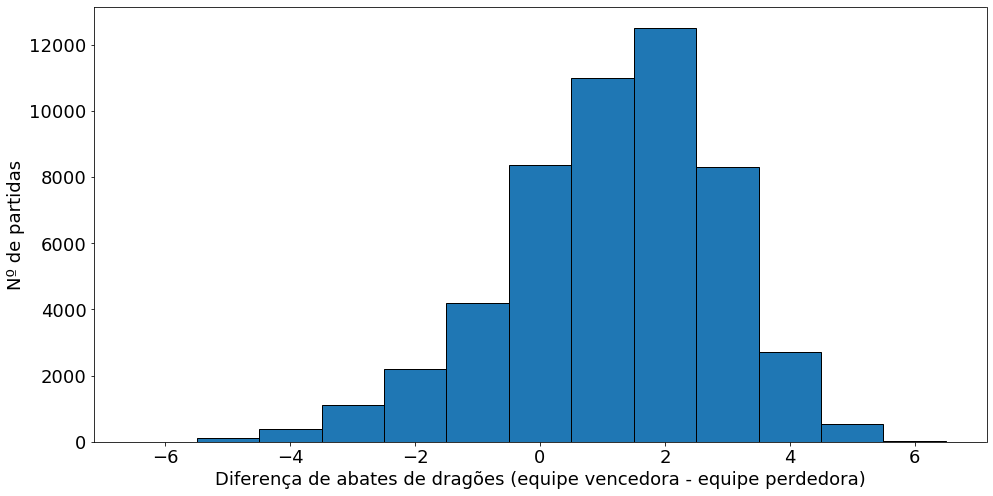

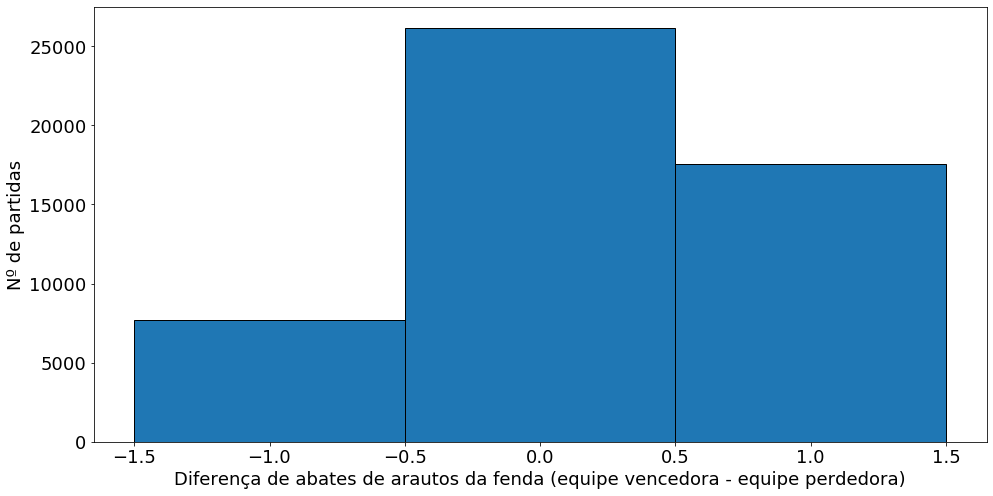

In [16]:
meu_plot(df['gameDuration']/60, 'Duração da partida em minutos', 'Nº de partidas', discr=False)
meu_plot(df['towerKillsDiff'], 'Diferença de abates de torres (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['inhibitorKillsDiff'], 'Diferença de abates de inibidores (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['baronKillsDiff'], 'Diferença de abates de barões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['dragonKillsDiff'], 'Diferença de abates de dragões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['riftHeraldDiff'], 'Diferença de abates de arautos da fenda (equipe vencedora - equipe perdedora)', 'Nº de partidas')

In [8]:
def compara(atributo1, atributo2, pr=0):
    soma = (atributo1 == atributo2).sum()
    somaVazio = (atributo2 == 0).sum()
    n = atributo1.size
    porcentagem = round(soma*100/n,2)
    porcentagemVazio = round(somaVazio*100/n,2)
    if(pr):
        print("Em {}% das partidas as equipes '{}' também conseguem '{}'. {}% das partidas não ocorre '{}'"
              .format(porcentagem, atributo1.name, atributo2.name, porcentagemVazio, atributo2.name))
    return porcentagem

In [9]:
compara(df['winner'], df['firstBlood'], 1)
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstInhibitor'], 1);
compara(df['winner'], df['firstDragon'], 1);
compara(df['winner'], df['firstBaron'], 1);
compara(df['winner'], df['firstRiftHerald'], 1);
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstBaron'], 1);

Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'
Em 65.39% das partidas as equipes 'winner' também conseguem 'firstDragon'. 3.88% das partidas não ocorre 'firstDragon'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'
Em 34.14% das partidas as equipes 'winner' também conseguem 'firstRiftHerald'. 50.84% das partidas não ocorre 'firstRiftHerald'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'


In [10]:
def perm(atributo1, atributo2, it=500):
    
    lista = []
    taxaObs = compara(atributo1, atributo2, 1)
    srt1 = atributo1.name
    str2 = atributo2.name
    atributo1 = atributo1.copy()
    
    for i in range(it):
        atributo1 = np.random.permutation(atributo1)
        lista.append(compara(atributo1, atributo2, 0))

    plt.figure(figsize=(16, 8))
    plt.hist(lista, bins=30)
    plt.title("Partidas com equipes {} e {}".format(srt1, str2))
    plt.axvline(x=taxaObs,c='red')
    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'


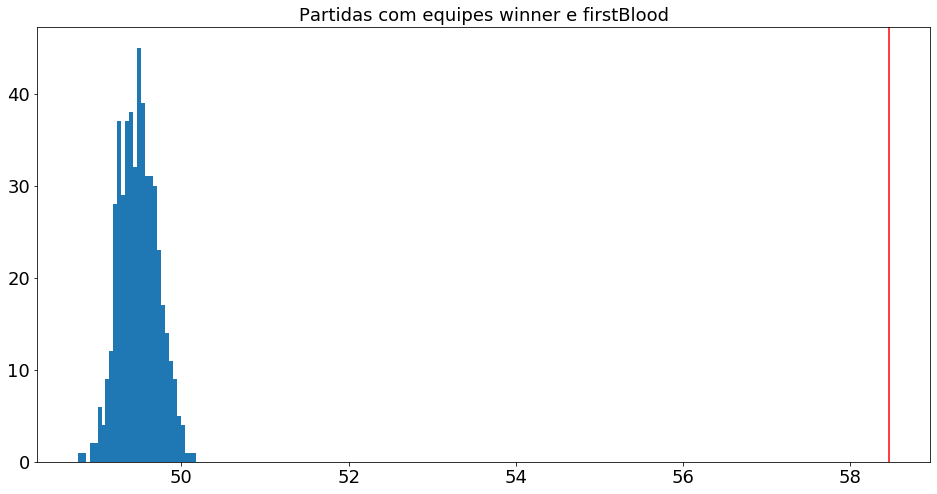

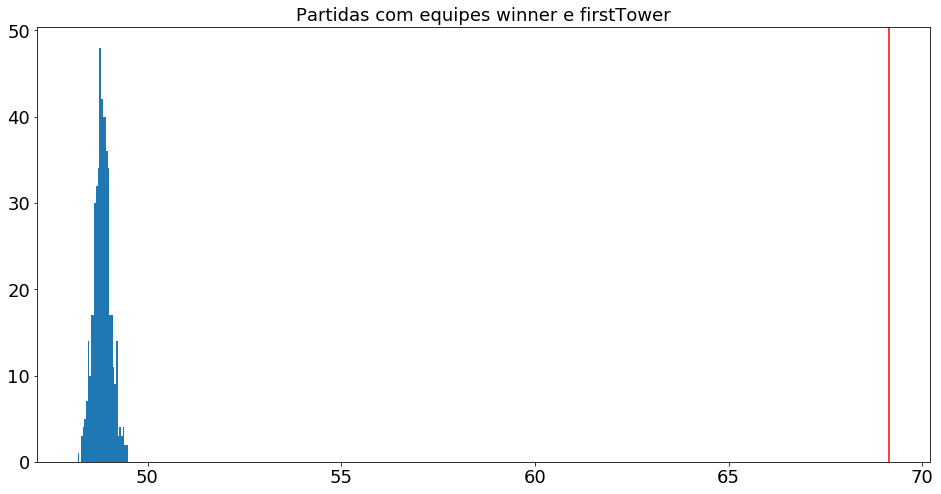

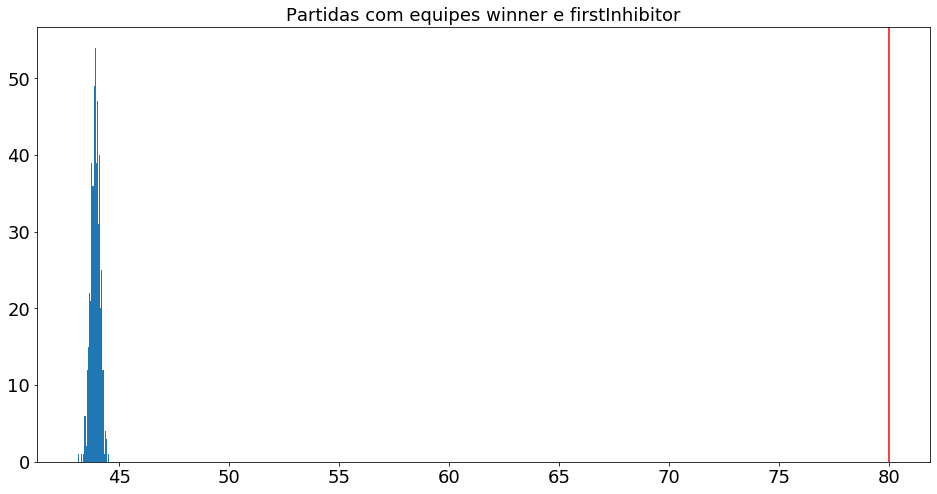

In [11]:
perm(df['winner'], df['firstBlood'])
perm(df['winner'], df['firstTower'])
perm(df['winner'], df['firstInhibitor'])

Em 60.22% das partidas as equipes 'firstBlood' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 30.24% das partidas as equipes 'firstBlood' também conseguem 'firstRiftHerald'. 50.84% das partidas não ocorre 'firstRiftHerald'
Em 34.27% das partidas as equipes 'firstBlood' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'


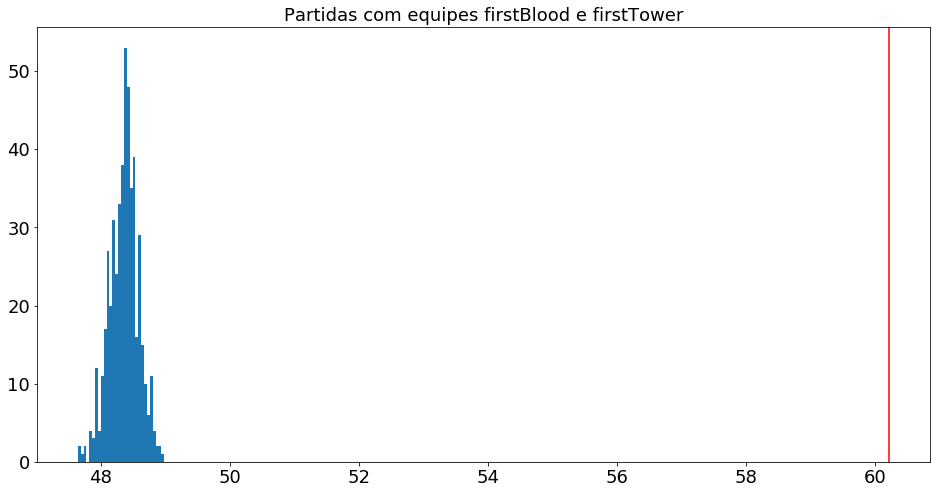

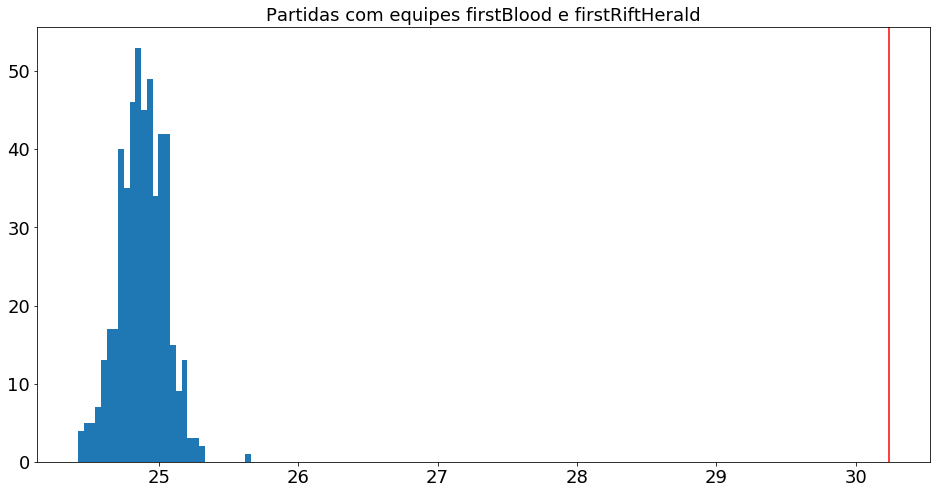

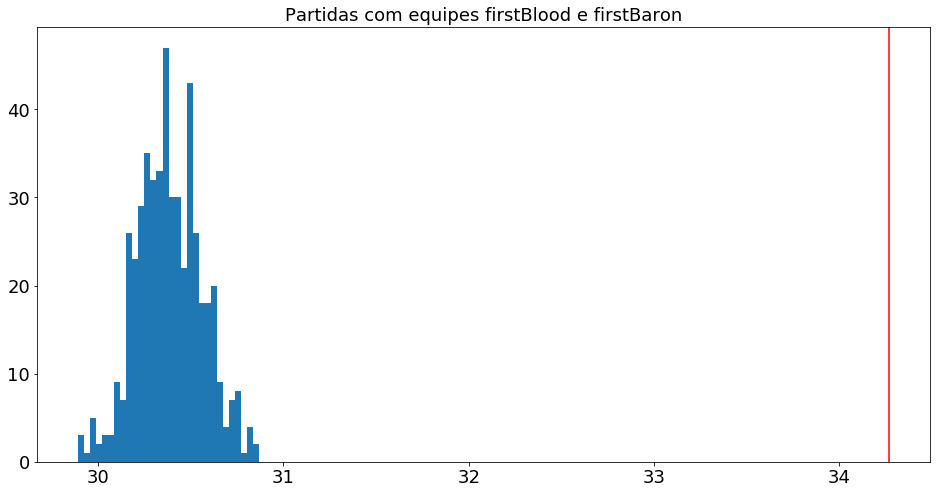

In [12]:
perm(df['firstBlood'], df['firstTower'])
perm(df['firstBlood'], df['firstRiftHerald'])
perm(df['firstBlood'], df['firstBaron'])